In [1]:
!pip install nltk

In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import seaborn as sns
from wordcloud import WordCloud
from sentence_transformers import SentenceTransformer
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, precision_recall_curve, auc, make_scorer, recall_score, accuracy_score, precision_score
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [3]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [4]:
# Data read

In [5]:
df =  pd.read_csv("emails.csv")

In [6]:
df.head(5)

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [7]:
# Getting idea about data set.

In [8]:
df.shape

(5728, 2)

In [9]:
df['text'][0]

"Subject: naturally irresistible your corporate identity  lt is really hard to recollect a company : the  market is full of suqgestions and the information isoverwhelminq ; but a good  catchy logo , stylish statlonery and outstanding website  will make the task much easier .  we do not promise that havinq ordered a iogo your  company will automaticaily become a world ieader : it isguite ciear that  without good products , effective business organization and practicable aim it  will be hotat nowadays market ; but we do promise that your marketing efforts  will become much more effective . here is the list of clear  benefits : creativeness : hand - made , original logos , specially done  to reflect your distinctive company image . convenience : logo and stationery  are provided in all formats ; easy - to - use content management system letsyou  change your website content and even its structure . promptness : you  will see logo drafts within three business days . affordability : your  ma

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


In [11]:
df.isnull().sum()

,0
text,0
spam,0


In [12]:
# EDA

##  "1" Indicates that Email is spam  "0" Indivates that Email is not spam

In [13]:
df['spam'].value_counts()

,count
spam,
0,4360
1,1368


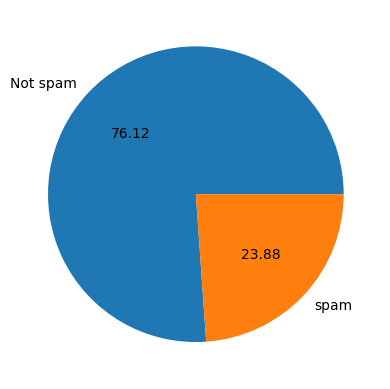

In [14]:
plt.pie(df['spam'].value_counts(),labels=['Not spam','spam'],autopct="%0.2f")
plt.show()

In [15]:
df['clean_text'] = df['text'].str.replace(r'^Subject:\s*', '', regex=True)

In [16]:
df1 = df[['clean_text','spam']]

In [17]:
df.head(5)

,text,spam,clean_text
0,Subject: naturally irresistible your corporate...,1,naturally irresistible your corporate identity...
1,Subject: the stock trading gunslinger fanny i...,1,the stock trading gunslinger fanny is merrill...
2,Subject: unbelievable new homes made easy im ...,1,unbelievable new homes made easy im wanting t...
3,Subject: 4 color printing special request add...,1,4 color printing special request additional i...
4,"Subject: do not have money , get software cds ...",1,"do not have money , get software cds from here..."


In [18]:
df1.head(5)

,clean_text,spam
0,naturally irresistible your corporate identity...,1
1,the stock trading gunslinger fanny is merrill...,1
2,unbelievable new homes made easy im wanting t...,1
3,4 color printing special request additional i...,1
4,"do not have money , get software cds from here...",1


In [19]:
df1['num_characters'] = df1['clean_text'].apply(len)

In [20]:
df1['num_words'] = df1['clean_text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [21]:
df1.head(10)

,clean_text,spam,num_characters,num_words
0,naturally irresistible your corporate identity...,1,1475,323
1,the stock trading gunslinger fanny is merrill...,1,589,88
2,unbelievable new homes made easy im wanting t...,1,439,86
3,4 color printing special request additional i...,1,491,97
4,"do not have money , get software cds from here...",1,226,51
5,"great nnews hello , welcome to medzonline sh ...",1,469,83
6,here ' s a hot play in motion homeland securi...,1,9331,1702
7,save your money buy getting this thing here y...,1,437,95
8,undeliverable : home based business for grownu...,1,498,120
9,save your money buy getting this thing here y...,1,437,95


In [22]:
df1[['num_characters','num_words']].describe()

,num_characters,num_words
count,5728.000000,5728.000000
mean,1547.768331,325.982542
std,2042.649903,418.833125
min,4.000000,1.000000
25%,499.750000,100.000000
50%,970.000000,209.000000
75%,1885.250000,401.000000
max,43943.000000,8477.000000


In [23]:
# Not Spam
df1[df1['spam'] == 0][['num_characters','num_words']].describe()

,num_characters,num_words
count,4360.000000,4360.000000
mean,1622.918119,344.835321
std,1959.664549,406.228875
min,4.000000,1.000000
25%,568.750000,118.000000
50%,1113.000000,238.000000
75%,2028.250000,438.250000
max,43943.000000,8477.000000


In [24]:
# Spam
df1[df1['spam'] == 1][['num_characters','num_words']].describe()

,num_characters,num_words
count,1368.000000,1368.000000
mean,1308.255848,265.896199
std,2271.373081,451.623124
min,9.000000,3.000000
25%,392.500000,78.000000
50%,684.500000,139.000000
75%,1241.250000,250.000000
max,28423.000000,6129.000000


<Axes: xlabel='num_characters', ylabel='Count'>

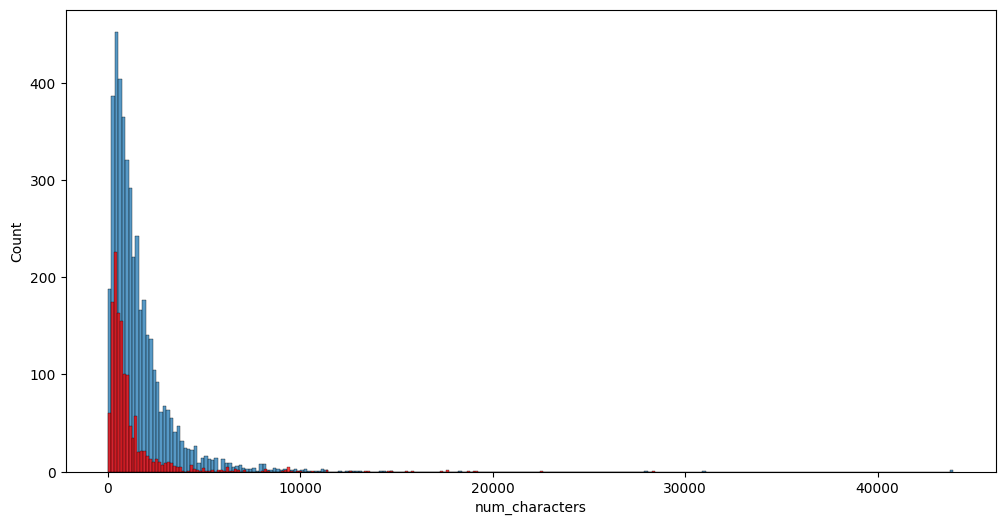

In [25]:
plt.figure(figsize=(12,6))
sns.histplot(df1[df1['spam'] == 0]['num_characters'])
sns.histplot(df1[df1['spam'] == 1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

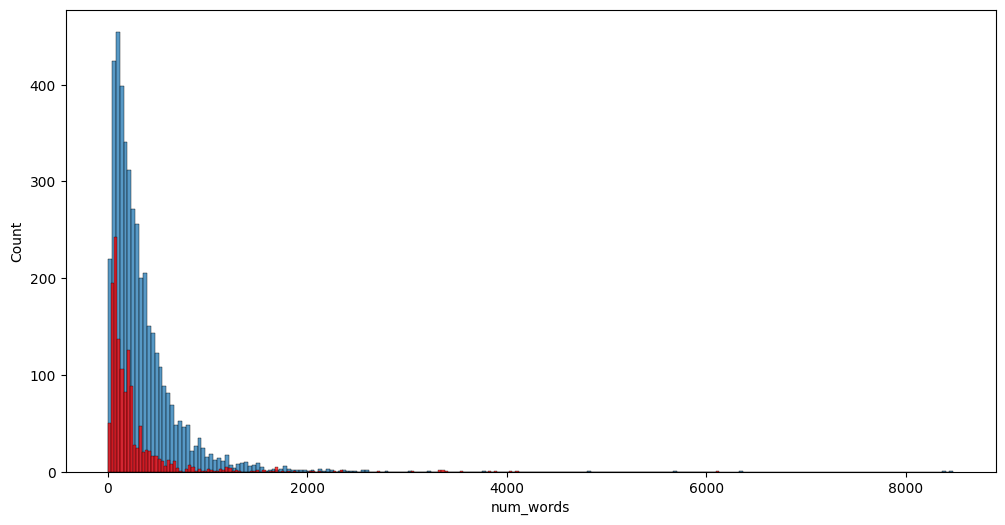

In [26]:
plt.figure(figsize=(12,6))
sns.histplot(df1[df1['spam'] == 0]['num_words'])
sns.histplot(df1[df1['spam'] == 1]['num_words'],color='red')

<Axes: >

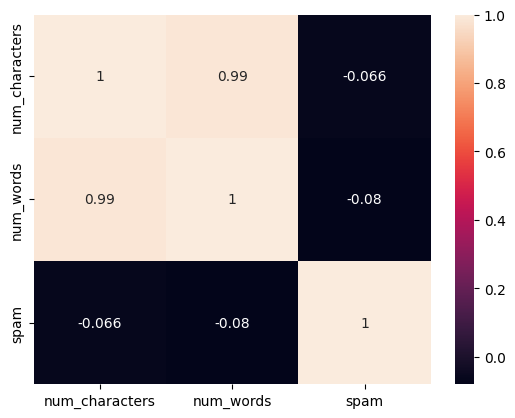

In [27]:
sns.heatmap(df1[['num_characters','num_words','spam']].corr(),annot=True)

In [28]:
# Data Preprocessing

In [29]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
import string
from nltk.stem import PorterStemmer

In [30]:
import nltk
nltk.download('stopwords')

stop_words = set(stopwords.words("english"))
default_stemmer = PorterStemmer()
default_stopwords = stopwords.words('english')
default_tokenizer=RegexpTokenizer(r"\w+")
punctuations = string.punctuation
ps = PorterStemmer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [31]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))


    return " ".join(y)

In [32]:
df1['transformed_text'] = df1['clean_text'].apply(transform_text)

In [33]:
df1.head(5)

,clean_text,spam,num_characters,num_words,transformed_text
0,naturally irresistible your corporate identity...,1,1475,323,natur irresist corpor ident lt realli hard rec...
1,the stock trading gunslinger fanny is merrill...,1,589,88,stock trade gunsling fanni merril muzo colza a...
2,unbelievable new homes made easy im wanting t...,1,439,86,unbeliev new home made easi im want show homeo...
3,4 color printing special request additional i...,1,491,97,4 color print special request addit inform cli...
4,"do not have money , get software cds from here...",1,226,51,money get softwar cd softwar compat great grow...


In [34]:
wc = WordCloud(width=1000,height=500,min_font_size=10,background_color='white')

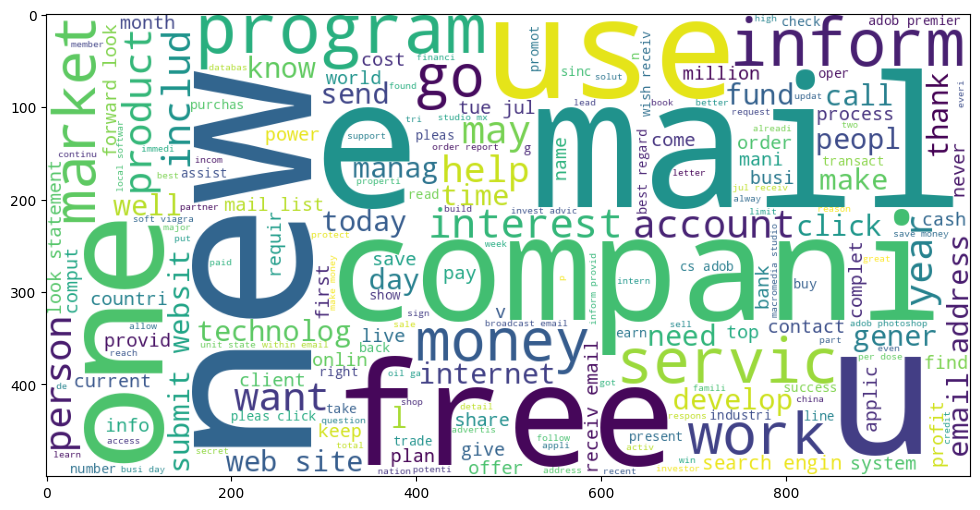

In [35]:
spam_wc = wc.generate(df1[df1['spam'] == 1]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

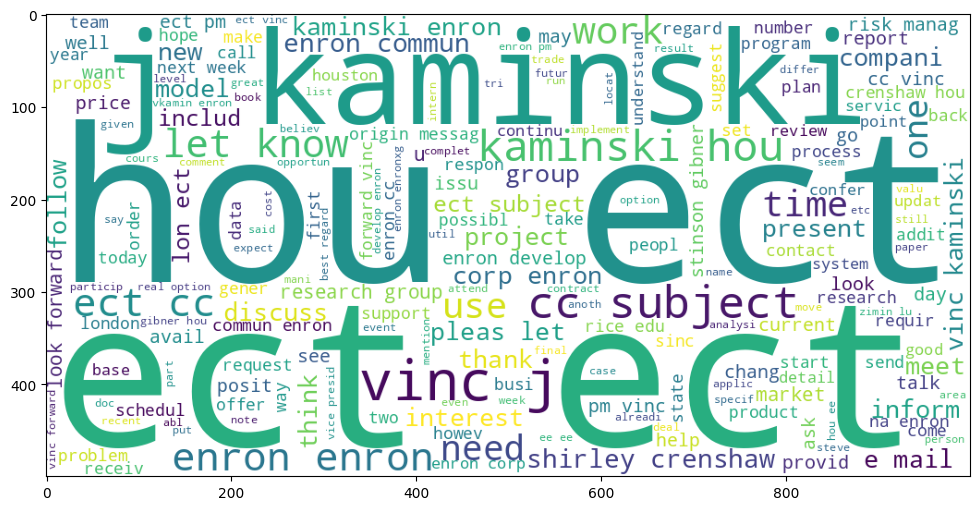

In [36]:
spam_wc = wc.generate(df1[df1['spam'] == 0]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [37]:
final_data = df1[['transformed_text','spam']]

In [38]:
final_data

,transformed_text,spam
0,natur irresist corpor ident lt realli hard rec...,1
1,stock trade gunsling fanni merril muzo colza a...,1
2,unbeliev new home made easi im want show homeo...,1
3,4 color print special request addit inform cli...,1
4,money get softwar cd softwar compat great grow...,1
...,...,...
5723,research develop charg gpg forward shirley cre...,0
5724,receipt visit jim thank invit visit lsu shirle...,0
5725,enron case studi updat wow day super thank muc...,0
5726,interest david pleas call shirley crenshaw ass...,0


In [39]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   transformed_text  5728 non-null   object
 1   spam              5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


In [40]:
# LLNS

In [41]:
# model = SentenceTransformer('bert-base-nli-mean-tokens') # used llm model to create meaning full embeddinf

# texts = final_data['transformed_text'].astype(str).tolist()
# embeddings = model.encode(texts, show_progress_bar=True)
# final_data['embedding'] = embeddings.tolist()


In [42]:
# TF-IFD

In [43]:
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [44]:
X = tfidf.fit_transform(final_data['transformed_text']).toarray()

In [45]:
Y = final_data['spam'].values

In [46]:
unique, counts = np.unique(Y, return_counts=True)
print(dict(zip(unique, counts)))

{np.int64(0): np.int64(4360), np.int64(1): np.int64(1368)}


In [47]:
sampling_strategy = {0: 4360, 1: 2500}

In [48]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy=sampling_strategy)
X_resampled, y_resampled = smote.fit_resample(X, Y)


In [49]:
unique, counts = np.unique(y_resampled, return_counts=True)
print(dict(zip(unique, counts)))

{np.int64(0): np.int64(4360), np.int64(1): np.int64(2500)}


In [51]:
scaler = StandardScaler()
scaler.fit(X_resampled)
x_1 = scaler.transform(X_resampled)

In [103]:
X_train,X_test,y_train,y_test = train_test_split(x_1, y_resampled,test_size=0.3,random_state=37)

In [104]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4802, 3000)
(2058, 3000)
(4802,)
(2058,)


In [54]:
# ML Model

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [61]:
# LOGISTIC REGRESSION

In [64]:
unique, counts = np.unique(y_test, return_counts=True)
print(dict(zip(unique, counts)))

{np.int64(0): np.int64(1305), np.int64(1): np.int64(753)}


In [58]:
lg = LogisticRegression()
lg.fit(X_train,y_train)
y_pred = lg.predict(X_test)

In [59]:
cm = confusion_matrix(y_test, y_pred)

In [60]:
cm

array([[1284,   21],
       [   3,  750]])

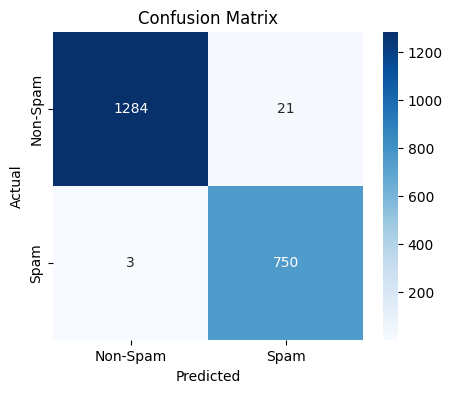

In [65]:
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Non-Spam", "Spam"], yticklabels=["Non-Spam", "Spam"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [63]:
# Model Accuracy
print("Classification Accuracy for LOGISTIC REGRESSION:", accuracy_score(y_test, y_pred))
print("Classification Report for LOGISTIC REGRESSION\n")
print(classification_report(y_test, y_pred))

Classification Accuracy for LOGISTIC REGRESSION: 0.9883381924198251
Classification Report for LOGISTIC REGRESSION

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1305
           1       0.97      1.00      0.98       753

    accuracy                           0.99      2058
   macro avg       0.99      0.99      0.99      2058
weighted avg       0.99      0.99      0.99      2058



In [113]:
y_pred_prob = lg.predict(X_test).ravel()

In [114]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)


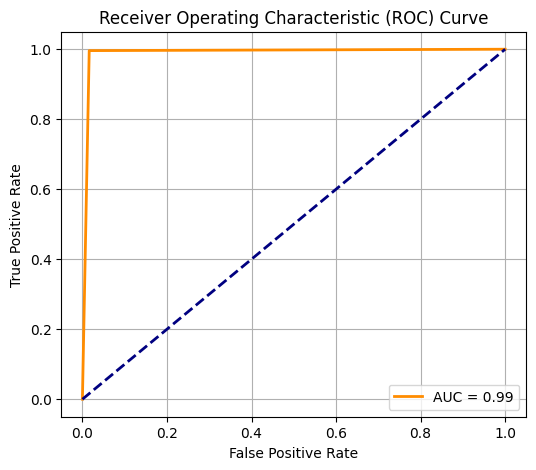

In [115]:
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [116]:
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_prob))


ROC AUC Score: 0.9899619911159958


In [112]:
# XGBoost

In [119]:
import xgboost as xgb

In [151]:
xg = xgb.XGBClassifier()
xg.fit(X_train,y_train)
y_pred = xg.predict(X_test)

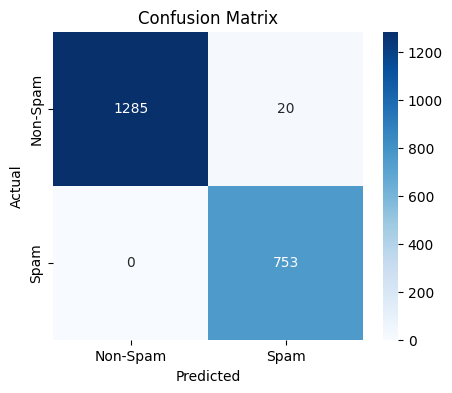

In [123]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Non-Spam", "Spam"], yticklabels=["Non-Spam", "Spam"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [124]:
# Model Accuracy
print("Classification Accuracy for xgb:", accuracy_score(y_test, y_pred))
print("Classification Report for xgb\n")
print(classification_report(y_test, y_pred))

Classification Accuracy for xgb: 0.9902818270165209
Classification Report for xgb

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1305
           1       0.97      1.00      0.99       753

    accuracy                           0.99      2058
   macro avg       0.99      0.99      0.99      2058
weighted avg       0.99      0.99      0.99      2058



In [125]:
y_pred_prob = model.predict(X_test).ravel()

In [126]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

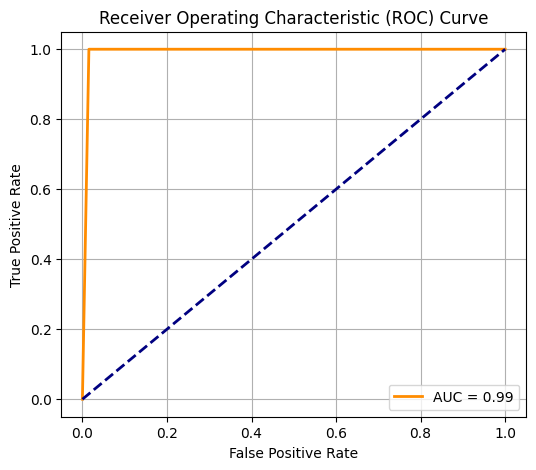

In [127]:
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [117]:
# KNN

In [70]:
from sklearn.neighbors import KNeighborsClassifier

In [72]:
kn = KNeighborsClassifier(n_neighbors=7)
kn.fit(X_train,y_train)
yn_pred = kn.predict(X_test)

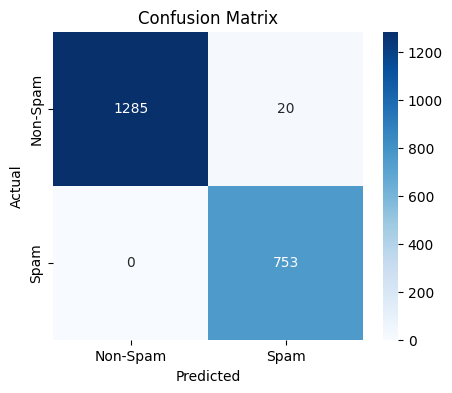

In [73]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Non-Spam", "Spam"], yticklabels=["Non-Spam", "Spam"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [97]:
# Model Accuracy
print("Classification Accuracy for KNN:", accuracy_score(y_test, y_pred))
print("Classification Report for KNN\n")
print(classification_report(y_test, y_pred))

Classification Accuracy for KNN: 0.6341107871720116
Classification Report for KNN

              precision    recall  f1-score   support

           0       0.63      1.00      0.78      1305
           1       0.00      0.00      0.00       753

    accuracy                           0.63      2058
   macro avg       0.32      0.50      0.39      2058
weighted avg       0.40      0.63      0.49      2058



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [83]:
# ANN

In [87]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [128]:
# ANN

In [130]:
from keras.optimizers import RMSprop

In [129]:
X_train.shape[1]

3000

In [137]:
model =Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

#compilation of the model
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])
#Training of the model
ann = model.fit(X_train, y_train, epochs=10, batch_size=60, validation_split=0.1)


Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_36 (Dense)                │ (None, 64)             │       192,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 194,177 (758.50 KB)

 Trainable params: 194,177 (758.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.8683 - loss: 0.2794 - val_accuracy: 0.9896 - val_loss: 0.0378
Epoch 2/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9984 - loss: 0.0067 - val_accuracy: 0.9917 - val_loss: 0.0313
Epoch 3/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 1.0000 - loss: 6.2391e-04 - val_accuracy: 0.9896 - val_loss: 0.0362
Epoch 4/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 1.0000 - loss: 1.1420e-04 - val_accuracy: 0.9896 - val_loss: 0.0359
Epoch 5/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 1.0000 - loss: 4.0752e-05 - val_accuracy: 0.9896 - val_loss: 0.0366
Epoch 6/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 2.5368e-05 - val_accuracy: 0.9896 - val_loss: 0.0371
Epoch 7/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 1.0000 - loss: 1.4806e-05 - val_accuracy: 0.9896 - val_loss: 0.0375
Epoch 8/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 1.3905e-05 - val_acc

In [138]:
y_pred = np.argmax(model.predict(X_test), axis=-1)

65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


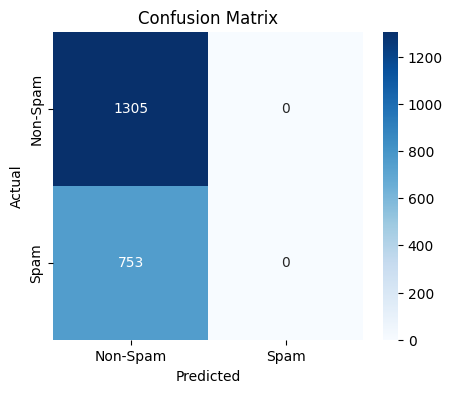

In [139]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Non-Spam", "Spam"], yticklabels=["Non-Spam", "Spam"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [140]:
# Model Accuracy
print("Classification Accuracy for KNN:", accuracy_score(y_test, y_pred))
print("Classification Report for KNN\n")
print(classification_report(y_test, y_pred))

Classification Accuracy for KNN: 0.6341107871720116
Classification Report for KNN

              precision    recall  f1-score   support

           0       0.63      1.00      0.78      1305
           1       0.00      0.00      0.00       753

    accuracy                           0.63      2058
   macro avg       0.32      0.50      0.39      2058
weighted avg       0.40      0.63      0.49      2058



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [141]:
# Save model

In [152]:
import joblib

# Save the model
joblib.dump(xg, 'xg.pkl')

# Load it later
model = joblib.load('xg.pkl')


In [144]:
joblib.dump(tfidf,"vectorizer.pkl")

['vectorizer.pkl']

In [150]:
df['text'][26]

"Subject: are you losing ? the answer would amaze you !  ? connecting your business to the world wide web ?  how  many shoppers are  you  losing ?  the  figure wouldamaze you !  how are youlosing them ?  they  cannot  findyour web  site !  a simple  equation  notbeing found = losing new customers !  we can change  that !  for only $ 119 . 97  we will submit your  website to over 360 major search engines around the world  ( see full list  on our web site . )  but  more than that  we will research the  best and most effective meta tags and keywords to use  on your web site so  that you will rise in the search enginelistings  so new  customers can find you !  don ' t lose any more customers !  let  us  professionally manage the submission of  your web site  and get  itfound and  seen on the  worlds search engines !  click onthis link  click  here !  to discover  thepower of  ? connecting  your business to the world wide web ? "

In [146]:
df['text'][2]

'Subject: unbelievable new homes made easy  im wanting to show you this  homeowner  you have been pre - approved for a $ 454 , 169 home loan at a 3 . 72 fixed rate .  this offer is being extended to you unconditionally and your credit is in no way a factor .  to take advantage of this limited time opportunity  all we ask is that you visit our website and complete  the 1 minute post approval form  look foward to hearing from you ,  dorcas pittman'